In [1]:
import sys
sys.path.append('../nemo-eva/src/')
import numpy

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 100)

In [3]:
in_df = pd.read_csv('/cluster/home/bdayan/girgs/nemo-eva/data-paper/3-cleaned_features/results.csv')

in_df = in_df.loc[in_df.Model == 'real-world']

in_df = in_df.sort_values('Nodes')
in_df.loc[in_df.Graph == 'ia-reality', ['Graph', 'Model', 'Nodes']].head(10)

,Graph,Model,Nodes
1133,ia-reality,real-world,6809


In [37]:
in_df_mini = in_df.loc[:, ['Graph', 'Model', 'Type', 'Nodes', 'Info']]

In [66]:
df = pd.read_csv('/cluster/home/bdayan/girgs/FeatureExtractionOut/2-features/results.csv')
df_mini = df.loc[:, ['Graph', 'Model', 'Nodes', 'Edges', 'Info']]

In [5]:
df_mini.shape

(815, 4)

In [122]:
df_mini.tail(10)

,Graph,Model,Nodes,Info
792,socfb-WashU32,hyperbolic,7897,n=7897|k=93.09169199594731|gamma=5.26840722166...
793,tech-WHOIS,3d-girg,7474,tau=3.1834581555602077|alpha=887710.9640177112...
794,socfb-Emory27,5d-girg,7449,tau=6.18328962453937|alpha=88771.9964017711|co...
795,socfb-Tulane29,real-world,7740,NaN
796,socfb-WashU32,1d-girg,7730,tau=5.232945122875073|alpha=1279.879254619388|...
797,socfb-Tulane29,ER,7740,NaN
798,socfb-Tulane29,BA circle,7740,NaN
799,socfb-Tulane29,BA full,7740,NaN
800,socfb-Tulane29,chung-lu,7661,NaN
801,socfb-Tulane29,hyperbolic,7935,n=7935|k=71.56843962692211|gamma=6.70221656592...


In [61]:
def get_hist(i):
    info = df.loc[i, 'Info']
    x = info.index('hist=')
    hist = eval(info[x+5:])
    return hist

hist = get_hist(644)

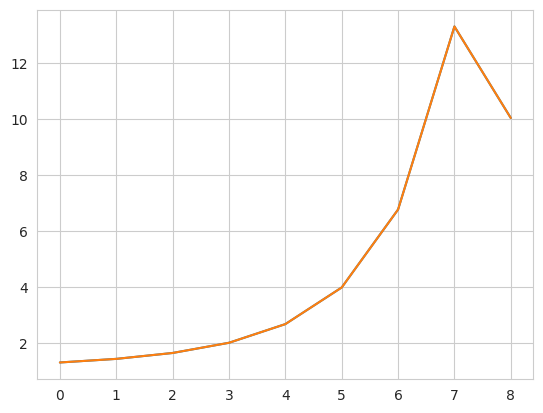

In [82]:
import matplotlib.pyplot as plt
plt.plot([x[0] for x in hist1])
plt.plot([x[0] for x in hist2])

In [79]:
df_mini.loc[df_mini.Graph == 'socfb-UChicago30']

,Graph,Model,Nodes,Info
637,socfb-UChicago30,real-world,6561,NaN
638,socfb-UChicago30,ER,6561,NaN
640,socfb-UChicago30,BA circle,6561,NaN
641,socfb-UChicago30,BA full,6561,NaN
642,socfb-UChicago30,chung-lu,6437,NaN
643,socfb-UChicago30,hyperbolic,6867,n=6867|k=60.61404019807748|gamma=4.84020534504...
644,socfb-UChicago30,1d-girg,6561,tau=4.794876828617721|alpha=10.03896961420325|...
647,socfb-UChicago30,2d-girg,6561,tau=4.794876828617721|alpha=10.03896961420325|...
648,socfb-UChicago30,3d-girg,6561,tau=4.794876828617721|alpha=10.03896961420325|...
650,socfb-UChicago30,4d-girg,6561,tau=4.794876828617721|alpha=10.03896961420325|...


In [81]:
hist1 = get_hist(644)
hist2 = get_hist(652)


In [83]:
hist1[:3]

[(1.3, 0.11640702736774317),
 (1.4285714285714286, 0.1386406400859225),
 (1.6396588486140726, 0.16692469034125512)]

In [84]:
hist2[:3]

[(1.3, 0.1178623868222712),
 (1.4285714285714286, 0.1390997648573515),
 (1.6396588486140726, 0.16751250511645155)]

In [129]:
import feature_cleaner
import imp
imp.reload(feature_cleaner)

<module 'feature_cleaner' from '../nemo-eva/src/feature_cleaner.py'>

In [130]:
graph_dicts = df.to_dict('records')
fc = feature_cleaner.FeatureCleaner(graph_dicts)

In [93]:
from helpers import dicts_to_df
df2 = dicts_to_df(fc.features)


In [96]:
set(df['Model'])

{'1d-girg',
 '2d-girg',
 '3d-girg',
 '4d-girg',
 '5d-girg',
 'BA circle',
 'BA full',
 'ER',
 'chung-lu',
 'hyperbolic',
 'real-world'}

In [97]:
df.sort_index(axis=1, inplace=True)

In [114]:
df.columns.name = "Feature"
df.set_index("Graph", inplace=True)
df['Info'] = df['Info'].fillna("no info")
object_cols = df.columns[df.dtypes == object]
df[object_cols] = df[object_cols].astype(str)

In [118]:
import os
os.environ['DATA_PATH'] = '/cluster/home/bdayan/girgs/'

In [119]:
fc.resultspath

'/cluster/home/bdayan/girgs/3-cleaned_features/results.csv'

In [131]:
fc.execute()

Feature: 296 ( unfiltered: 346 )
missing graphs for 4d-girg model: {'inf-power', 'web-EPA', 'ia-reality', 'rec-movielens-user-movies-10m', 'socfb-WashU32', 'rt-twitter-copen', 'socfb-nips-ego', 'inf-openflights', 'ca-GrQc', 'tech-WHOIS', 'socfb-Tulane29', 'bio-dmela'}
missing graphs for hyperbolic model: set()
missing graphs for 5d-girg model: {'inf-power', 'web-EPA', 'ia-reality', 'rec-movielens-user-movies-10m', 'socfb-WashU32', 'rt-twitter-copen', 'socfb-nips-ego', 'inf-openflights', 'ca-GrQc', 'tech-WHOIS', 'socfb-Tulane29', 'bio-dmela'}
missing graphs for 2d-girg model: {'web-EPA', 'ia-reality', 'rec-movielens-user-movies-10m', 'socfb-WashU32', 'socfb-nips-ego', 'inf-openflights', 'ca-GrQc', 'socfb-Tulane29', 'bio-dmela'}
missing graphs for ER model: set()
missing graphs for BA circle model: set()
missing graphs for chung-lu model: set()
missing graphs for 3d-girg model: {'web-EPA', 'ia-reality', 'rec-movielens-user-movies-10m', 'socfb-WashU32', 'rt-twitter-copen', 'socfb-nips-ego

../nemo-eva/src/feature_cleaner.py:47: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_real = df_real.loc[complete_graphs]
../nemo-eva/src/feature_cleaner.py:48: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_cleaned = df_features_cleaned.loc[complete_graphs]
../nemo-eva/src/feature_cleaner.py:99: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variation = df_finite_filtered.std() / df_finite_filtered.mean() / (len(df_finite_filtered)-1)**0.5
../nemo-eva/src/feature_cleaner.py:99: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, sp

In [32]:
df_clean = pd.read_csv('/cluster/home/bdayan/girgs/3-cleaned_features/results.csv')
df_real = df_clean.loc[df_clean.Model == 'real-world']

In [12]:
from helpers.plotting import scatter
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

In [25]:
import seaborn as sns

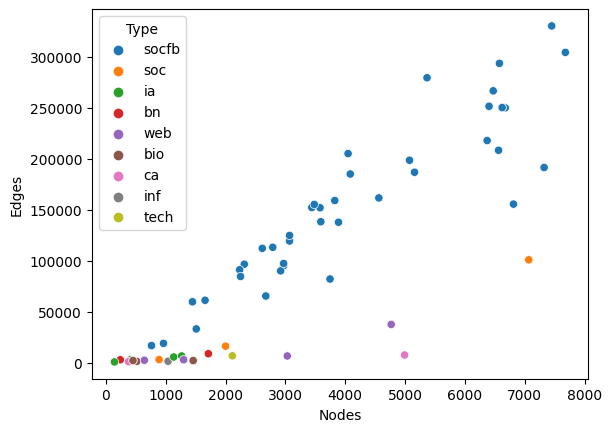

In [33]:
sns.scatterplot(x='Nodes', y='Edges', data=df_real, hue='Type')
plt.show()

In [53]:
df_clean_modsubset = df_clean.loc[df_clean.Model.isin(['real-world', 'chung-lu', 'hyperbolic', '1d-girg', '3d-girg'])]

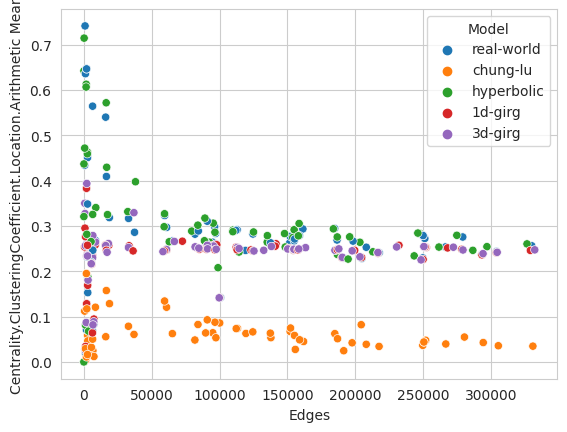

In [54]:
sns.scatterplot(x='Edges', y='Centrality.ClusteringCoefficient.Location.Arithmetic Mean', data=df_clean_modsubset, hue='Model')
plt.show()

In [63]:
CC = 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean'

In [59]:
temp = df_clean_modsubset.sort_values(['Graph', 'Model']).loc[:, ['Graph', 'Model', 'Edges', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean']]
temp.head(20)

,Graph,Model,Edges,Centrality.ClusteringCoefficient.Location.Arithmetic Mean
666,bio-celegans,1d-girg,1976,0.383038
668,bio-celegans,3d-girg,2200,0.393607
664,bio-celegans,chung-lu,1880,0.194926
665,bio-celegans,hyperbolic,1683,0.606415
660,bio-celegans,real-world,2025,0.646463
523,bio-celegans-dir,1d-girg,1976,0.383038
525,bio-celegans-dir,3d-girg,2200,0.393607
521,bio-celegans-dir,chung-lu,1880,0.194926
522,bio-celegans-dir,hyperbolic,1749,0.612589
517,bio-celegans-dir,real-world,2025,0.646463


In [67]:
df_mini.loc[df_mini.Graph == 'bio-yeast']

,Graph,Model,Nodes,Edges,Info
159,bio-yeast,real-world,1458,1948,NaN
161,bio-yeast,ER,1333,1958,NaN
163,bio-yeast,BA circle,1458,1948,NaN
164,bio-yeast,BA full,1458,1948,NaN
166,bio-yeast,chung-lu,1090,1912,NaN
175,bio-yeast,hyperbolic,1117,1299,n=2619|k=1.4881588999236057|gamma=3.5097267779...
526,bio-yeast,1d-girg,1210,2088,tau=2.9848742153573937|alpha=1.216198502940622...
569,bio-yeast,2d-girg,1183,1886,tau=2.9848742153573937|alpha=1.218209034912959...
586,bio-yeast,3d-girg,1190,1762,tau=2.9848742153573937|alpha=1.190647662316176...
610,bio-yeast,4d-girg,1195,1921,tau=2.9848742153573937|alpha=1.271468827051778...


In [65]:
df.loc[526, 'Info']

'tau=2.9848742153573937|alpha=1.2161985029406228|const=0.009379502054907412|fit=False|target_lcc=0.07083049680177281|hist=[(1.3, 0.0869233995475262), (1.21, 0.06308578011143054), (1.2470588235294118, 0.07934482809704911), (1.2285294117647059, 0.07414259381607802), (1.2096757352941176, 0.07596798581818996), (1.1906476623161764, 0.07357763887208847), (1.171616259425464, 0.06032005926157338), (1.1806320569689255, 0.059610676592134426), (1.1911255673365813, 0.06240266684098817), (1.2034103579190385, 0.06752975874920675), (1.2178852455499798, 0.07344035069685631), (1.2106478017345093, 0.06552270185631895), (1.2142054074770923, 0.0659045487022762), (1.2181915984041534, 0.07132316111655816), (1.2161985029406228, 0.06903175462599452)]'

In [62]:
hist = get_hist(526)
hist

[(1.3, 0.0869233995475262),
 (1.21, 0.06308578011143054),
 (1.2470588235294118, 0.07934482809704911),
 (1.2285294117647059, 0.07414259381607802),
 (1.2096757352941176, 0.07596798581818996),
 (1.1906476623161764, 0.07357763887208847),
 (1.171616259425464, 0.06032005926157338),
 (1.1806320569689255, 0.059610676592134426),
 (1.1911255673365813, 0.06240266684098817),
 (1.2034103579190385, 0.06752975874920675),
 (1.2178852455499798, 0.07344035069685631),
 (1.2106478017345093, 0.06552270185631895),
 (1.2142054074770923, 0.0659045487022762),
 (1.2181915984041534, 0.07132316111655816),
 (1.2161985029406228, 0.06903175462599452)]

In [41]:
import glob
data_dir = '/cluster/scratch/bdayan/GIRG_data/'

graph_name_group_pairs = in_df[['Graph', 'Type']].to_numpy()
graph_dicts = []
for graph_name, group in graph_name_group_pairs:
    fn = glob.glob(data_dir + graph_name + '.*')[0]
    print(fn)
    graph_dict = {"Group": group, "FullPath": fn, "Name": graph_name}
    graph_dicts.append(graph_dict)

/cluster/scratch/bdayan/GIRG_data/ia-enron-only.SpaceOne
/cluster/scratch/bdayan/GIRG_data/bn-macaque-rhesus_brain_1.SpaceOne
/cluster/scratch/bdayan/GIRG_data/inf-USAir97.SpaceOne
/cluster/scratch/bdayan/GIRG_data/ca-netscience.SpaceOne
/cluster/scratch/bdayan/GIRG_data/ia-infect-dublin.SpaceOne
/cluster/scratch/bdayan/GIRG_data/bio-celegans.SpaceOne
/cluster/scratch/bdayan/GIRG_data/bio-celegans-dir.SpaceOne
/cluster/scratch/bdayan/GIRG_data/bio-diseasome.SpaceOne
/cluster/scratch/bdayan/GIRG_data/web-polblogs.SpaceOne
/cluster/scratch/bdayan/GIRG_data/rt-twitter-copen.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne
/cluster/scratch/bdayan/GIRG_data/soc-wiki-Vote.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/inf-euroroad.SpaceOne
/cluster/scratch/bdayan/GIRG_data/ia-email-univ.SpaceOne
/cluster/scratch/bdayan/GIRG_data/ia-fb-messages.SpaceOne
/cluster/scratch/bdayan/GIRG_data/web-google.SpaceOne
/cluster/scratch

In [42]:
graph_dicts_bn = [x for x in graph_dicts if x['Group'] == 'bn']
graph_dicts_bn

[{'Group': 'bn',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bn-macaque-rhesus_brain_1.SpaceOne',
  'Name': 'bn-macaque-rhesus_brain_1'},
 {'Group': 'bn',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bn-fly-drosophila_medulla_1.SpaceOne',
  'Name': 'bn-fly-drosophila_medulla_1'},
 {'Group': 'bn',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bn-human-BNU_1_0025889_session_2.SpaceOne',
  'Name': 'bn-human-BNU_1_0025889_session_2'},
 {'Group': 'bn',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bn-human-BNU_1_0025873_session_1-bg.SpaceOne',
  'Name': 'bn-human-BNU_1_0025873_session_1-bg'}]

In [43]:
import networkit as nk

g = nk.readGraph('/cluster/scratch/bdayan/GIRG_data/bio-yeast.SpaceOne', nk.Format.EdgeListSpaceOne)

In [44]:
g.numberOfNodes()

1827236

In [46]:
g = nk.readGraph('/cluster/scratch/bdayan/GIRG_data/bn-human-BNU_1_0025873_session_1-bg.SpaceOne', nk.Format.EdgeListSpaceOne)
g.numberOfNodes()

1827151

,Graph,Model,Type,Nodes,Info
1259,web-baidu-baike-related,real-world,web,372840,no info
1193,soc-twitter-follows,real-world,soc,404719,no info
821,rt-higgs,real-world,rt,424075,no info
1055,soc-dogster,real-world,soc,426485,no info
1109,soc-twitter-higgs,real-world,soc,456293,no info
905,soc-twitter-follows-mun,real-world,soc,465017,no info
755,soc-youtube,real-world,soc,495957,no info
929,soc-flickr,real-world,soc,513969,no info
701,soc-delicious,real-world,soc,536108,no info
1301,ca-coauthors-dblp,real-world,ca,540486,no info


In [49]:
in_df_mini.loc[in_df.Type == 'bn']

,Graph,Model,Type,Nodes,Info
827,bn-macaque-rhesus_brain_1,real-world,bn,242,no info
923,bn-fly-drosophila_medulla_1,real-world,bn,1770,no info
611,bn-human-BNU_1_0025889_session_2,real-world,bn,11382,no info
1079,bn-human-BNU_1_0025873_session_1-bg,real-world,bn,92043,no info


In [ ]:
alpha = 1.3
for _ in range(10):
    alpha = utils.scale_param()

In [39]:
df2 = pd.read_csv('/cluster/home/bdayan/girgs/nemo-eva/data-paper/3-cleaned_features/results.csv')

In [40]:
df2.shape

(1314, 243)

In [41]:
df2 = df2.loc[df2.Model == 'real-world']

In [42]:
df2 = df2.sort_values('Nodes')

In [43]:
df2.loc[:, ['Graph', 'Model', 'Nodes', 'Info']]

,Graph,Model,Nodes,Info
725,ia-enron-only,real-world,143,no info
827,bn-macaque-rhesus_brain_1,real-world,242,no info
59,inf-USAir97,real-world,332,no info
395,ca-netscience,real-world,379,no info
215,ia-infect-dublin,real-world,410,no info
...,...,...,...,...
83,web-BerkStan-dir,real-world,654782,no info
143,web-google-dir,real-world,855802,no info
179,ca-IMDB,real-world,896305,no info
1313,rt-retweet-crawl,real-world,1112702,no info


In [55]:
pairs

array([['ia-enron-only', 'ia'],
       ['bn-macaque-rhesus_brain_1', 'bn'],
       ['inf-USAir97', 'inf'],
       ['ca-netscience', 'ca'],
       ['ia-infect-dublin', 'ia'],
       ['bio-celegans', 'bio'],
       ['bio-celegans-dir', 'bio'],
       ['bio-diseasome', 'bio'],
       ['web-polblogs', 'web'],
       ['rt-twitter-copen', 'rt'],
       ['socfb-Caltech36', 'socfb'],
       ['soc-wiki-Vote', 'soc'],
       ['socfb-Reed98', 'socfb'],
       ['inf-euroroad', 'inf'],
       ['ia-email-univ', 'ia'],
       ['ia-fb-messages', 'ia'],
       ['web-google', 'web'],
       ['socfb-Haverford76', 'socfb'],
       ['bio-yeast', 'bio'],
       ['bio-yeast-protein-inter', 'bio'],
       ['socfb-Simmons81', 'socfb'],
       ['socfb-Swarthmore42', 'socfb'],
       ['bn-fly-drosophila_medulla_1', 'bn'],
       ['soc-hamsterster', 'soc'],
       ['tech-routers-rf', 'tech'],
       ['socfb-Amherst41', 'socfb'],
       ['socfb-Bowdoin47', 'socfb'],
       ['socfb-Hamilton46', 'socfb'],
       ['s

In [54]:
pairs = df2[['Graph', 'Type']].to_numpy()
for a, b in pairs:
    print(a, b)

ia-enron-only ia
bn-macaque-rhesus_brain_1 bn
inf-USAir97 inf
ca-netscience ca
ia-infect-dublin ia
bio-celegans bio
bio-celegans-dir bio
bio-diseasome bio
web-polblogs web
rt-twitter-copen rt
socfb-Caltech36 socfb
soc-wiki-Vote soc
socfb-Reed98 socfb
inf-euroroad inf
ia-email-univ ia
ia-fb-messages ia
web-google web
socfb-Haverford76 socfb
bio-yeast bio
bio-yeast-protein-inter bio
socfb-Simmons81 socfb
socfb-Swarthmore42 socfb
bn-fly-drosophila_medulla_1 bn
soc-hamsterster soc
tech-routers-rf tech
socfb-Amherst41 socfb
socfb-Bowdoin47 socfb
socfb-Hamilton46 socfb
socfb-Trinity100 socfb
socfb-USFCA72 socfb
socfb-Williams40 socfb
socfb-nips-ego socfb
inf-openflights inf
socfb-Oberlin44 socfb
socfb-Wellesley22 socfb
socfb-Smith60 socfb
web-edu web
socfb-Vassar85 socfb
socfb-Middlebury45 socfb
socfb-Pepperdine86 socfb
socfb-Colgate88 socfb
socfb-Santa74 socfb
socfb-Wesleyan43 socfb
socfb-Mich67 socfb
socfb-Bucknell39 socfb
socfb-Brandeis99 socfb
socfb-Howard90 socfb
socfb-Rice31 socfb
ca-G

In [46]:
for a, b in df2.loc[:, ['Graph', 'Model']].rows:
    print(a, b)

AttributeError: 'DataFrame' object has no attribute 'rows'